
# Case Study
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

** Here MFI Provide the finanicial service to poor customer whith the assiatance of telecom comapny, whose network is used to provide the service to the prro customers


# Problem Statement
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

Output/target variable is an categorical variable, it's an classification problem.

In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data file.csv data from local repository
# cdp: Credit defaulter Project
cdp_df=pd.read_csv("/Users/bhupendrakumar/Documents/Internship/Micro Credit Project/Data file.csv")

In [3]:
cdp_df.head()
# label is our output feature. Where, 0: Non-defaulter, 1: Defaulter

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
cdp_df.shape
# 209593 points are given and 36 dependent variables are present.

(209593, 37)

In [5]:
cdp_df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## Variables Description

In [6]:
cdp_df['pdate']=pd.to_datetime(cdp_df['pdate'])
cdp_df['month']=cdp_df['pdate'].dt.month
cdp_df['year']=cdp_df['pdate'].dt.year

In [7]:
# We can remove unnamed:0 and msisdn feature, as it won't serve any purpose for our prediction.
# msisdn might be proven helpful in future, if we can verify legality of numbers.
# Removing date column as well, as we have stored year and month in separate columns.
cdp_df.drop(['Unnamed: 0','msisdn','pdate'],axis=1,inplace=True)

In [8]:
# Data types of given variables
cdp_df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [9]:
# Statistics of different variables
cdp_df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,2016.0
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2016.0
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,2016.0
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,2016.0
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,2016.0
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,2016.0


In [10]:
temp_df=cdp_df[cdp_df['aon']<0]
temp2_df=cdp_df[cdp_df['aon']>=1]
temp2_df=temp2_df[temp2_df['aon']<=48]

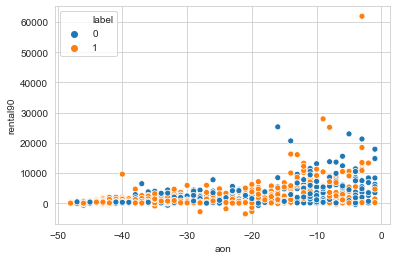

In [11]:
sns.set_style('whitegrid')
sns.scatterplot(x='aon',y='rental90',hue='label',data=temp_df)

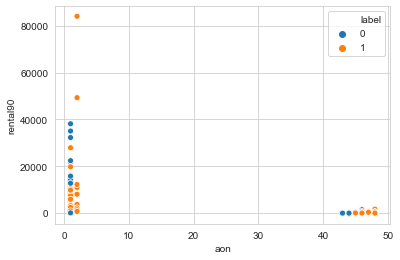

In [12]:
sns.set_style('whitegrid')
sns.scatterplot(x='aon',y='rental90',hue='label',data=temp2_df)

In [13]:
cdp_df['label'].value_counts()
# Clearly it's an imbalanced data set

1    183431
0     26162
Name: label, dtype: int64

In [14]:
cdp_df['pcircle'].value_counts()
# We can remove pcircle as value is unique, it might not be a useful column for time being.

UPW    209593
Name: pcircle, dtype: int64

In [15]:
# Thirty one duplicate points are present in the provided data. Probably used different mobile numbers. 
cdp_df.duplicated().sum()

331

In [16]:
cdp_df.drop_duplicates(inplace=True)

In [17]:
cdp_df.duplicated().sum()
# We have removed all the duplicate values

0

In [18]:
# Missing Value Analysis
cdp_df.isna().sum()
# Null values are not present

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
month                   0
year                    0
dtype: int64

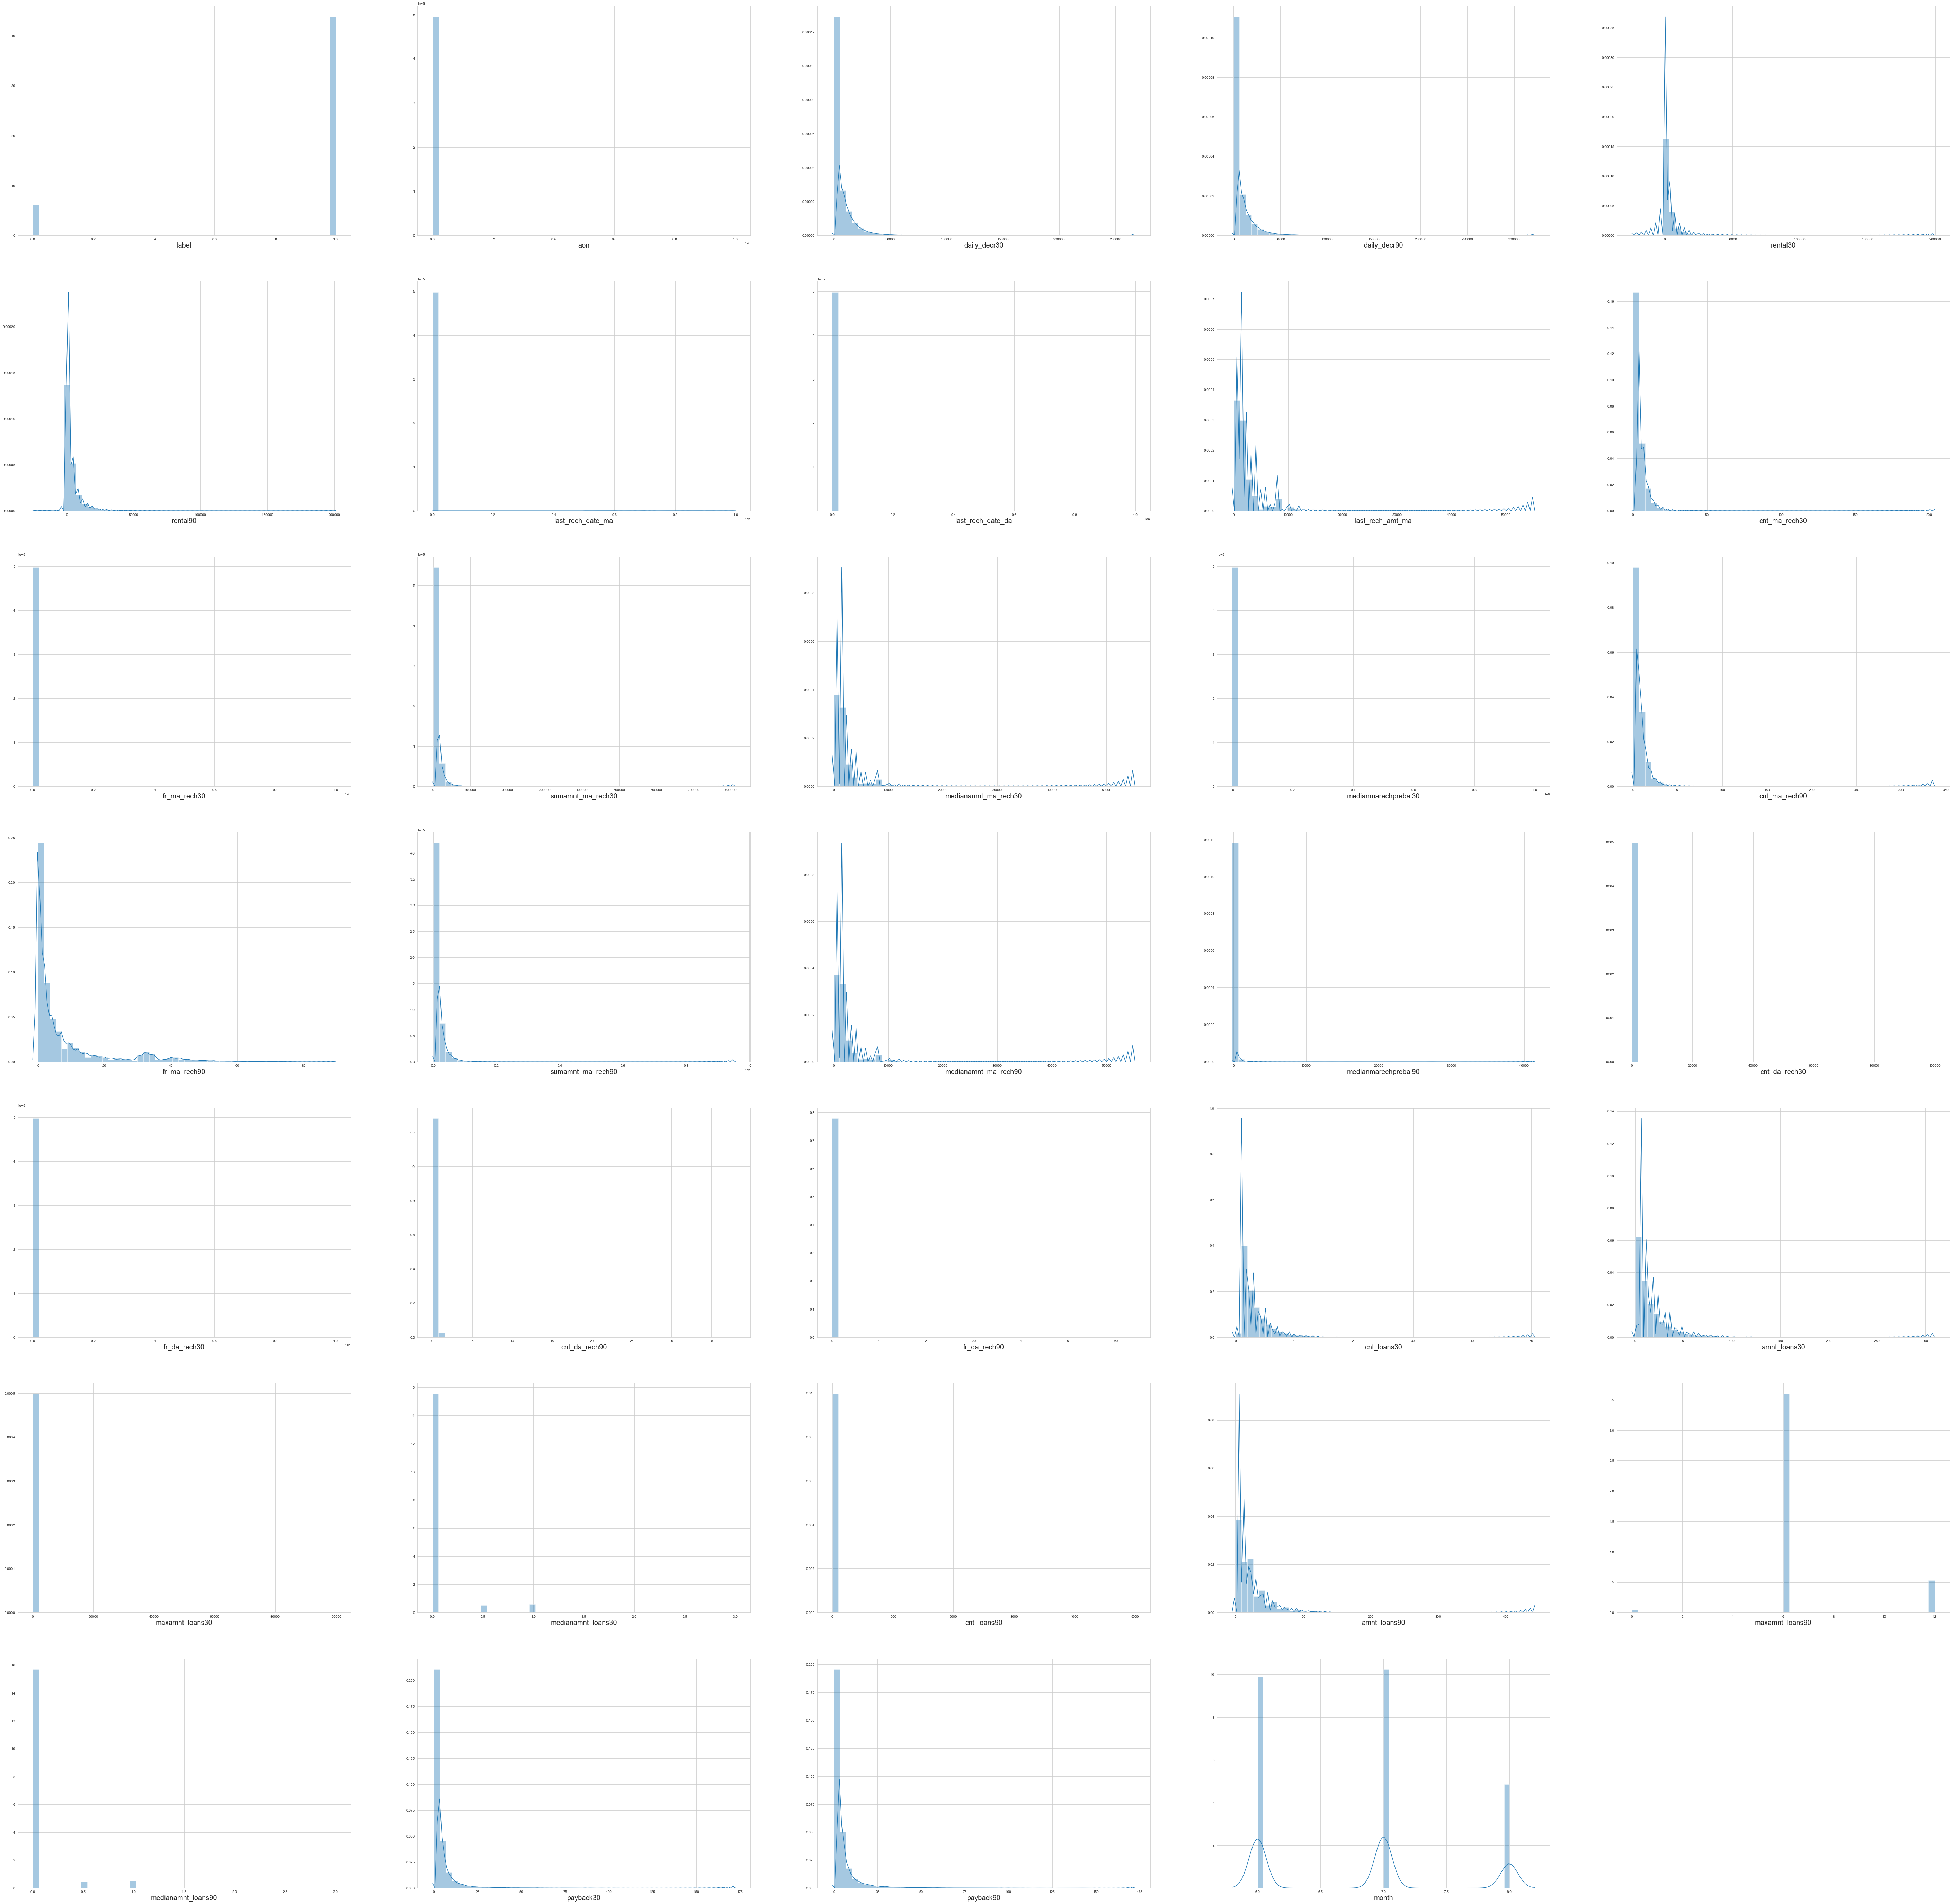

In [19]:
# Checking how features are distributed
plt.figure(figsize=(100,100))
plotnumber=1
colList=list(cdp_df.columns)
colList.remove('pcircle')
for activeCol in colList:
    if plotnumber<=34:
        sns.set_style('whitegrid')
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(cdp_df[activeCol])
        plt.xlabel(activeCol,fontsize=20)
    plotnumber+=1
plt.show()

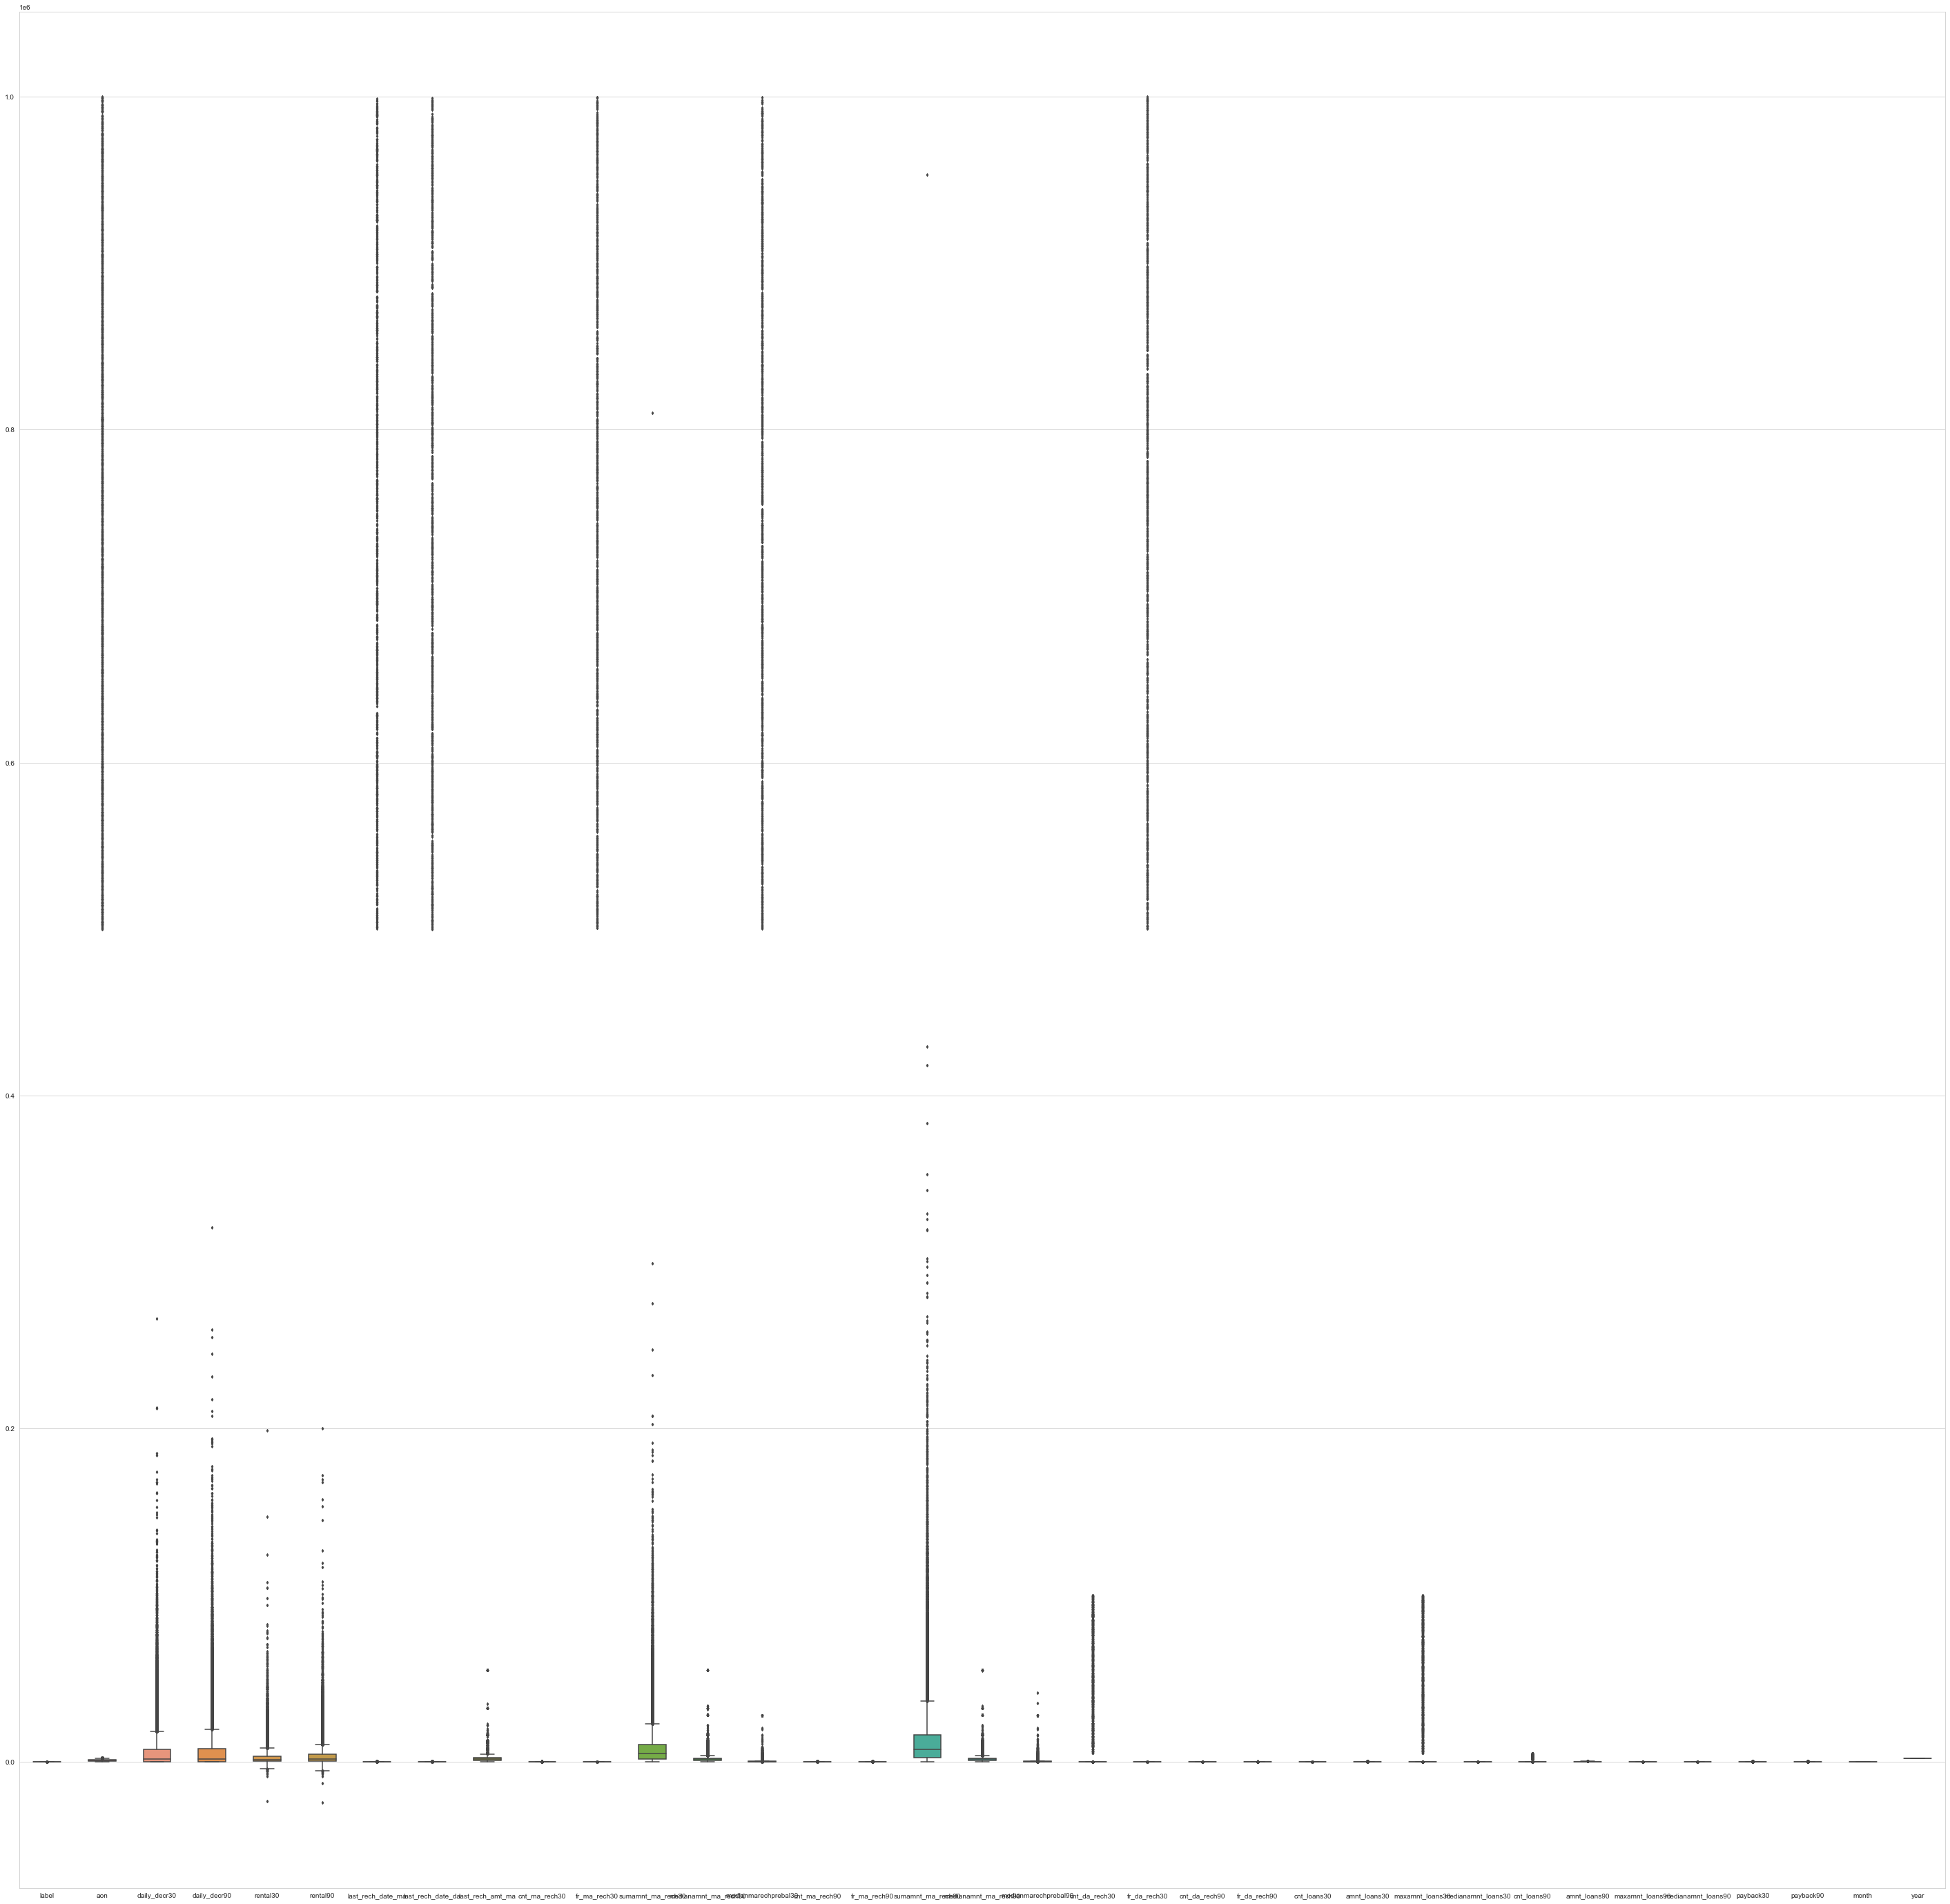

In [20]:
fig,ax=plt.subplots(figsize=(50,50))
sns.boxplot(data=cdp_df,width=0.5,ax=ax,fliersize=3)

In [21]:
# Treating Outliers
# Checking  1% and 98% quantile values for each column
colList=list(cdp_df.columns)
colList.remove('pcircle')

for sActiveCol in colList:
    print("1 percentile for {} is {} and min is {}".format(sActiveCol,cdp_df[sActiveCol].quantile(.01),cdp_df[sActiveCol].min()))
    print("99 percentile for {} is {} and max value is {}".format(sActiveCol,cdp_df[sActiveCol].quantile(.99),cdp_df[sActiveCol].max()))

1 percentile for label is 0.0 and min is 0
99 percentile for label is 1.0 and max value is 1
1 percentile for aon is 55.0 and min is -48.0
99 percentile for aon is 2423.9499999999243 and max value is 999860.755167902
1 percentile for daily_decr30 is 0.0 and min is -93.0126666666667
99 percentile for daily_decr30 is 41751.55999999994 and max value is 265926.0
1 percentile for daily_decr90 is 0.0 and min is -93.0126666666667
99 percentile for daily_decr90 is 49981.14649999996 and max value is 320630.0
1 percentile for rental30 is -301.05359999999996 and min is -23737.14
99 percentile for rental30 is 19478.016799999998 and max value is 198926.11
1 percentile for rental90 is -350.8243 and min is -24720.58
99 percentile for rental90 is 27009.47399999996 and max value is 200148.11
1 percentile for last_rech_date_ma is 0.0 and min is -29.0
99 percentile for last_rech_date_ma is 57.0 and max value is 998650.3777327021
1 percentile for last_rech_date_da is 0.0 and min is -29.0
99 percentile for

In [22]:
# Treating Outliers
# Checking  2% and 98% quantile values for each column

for sActiveCol in colList:
    print("2 percentile for {} is {} and min is {}".format(sActiveCol,cdp_df[sActiveCol].quantile(.02),cdp_df[sActiveCol].min()))
    print("98 percentile for {} is {} and max value is {}".format(sActiveCol,cdp_df[sActiveCol].quantile(.98),cdp_df[sActiveCol].max()))

2 percentile for label is 0.0 and min is 0
98 percentile for label is 1.0 and max value is 1
2 percentile for aon is 73.0 and min is -48.0
98 percentile for aon is 2041.0 and max value is 999860.755167902
2 percentile for daily_decr30 is 0.0 and min is -93.0126666666667
98 percentile for daily_decr30 is 32992.86506666667 and max value is 265926.0
2 percentile for daily_decr90 is 0.0 and min is -93.0126666666667
98 percentile for daily_decr90 is 39095.72333333335 and max value is 320630.0
2 percentile for rental30 is -78.24 and min is -23737.14
98 percentile for rental30 is 15953.8918 and max value is 198926.11
2 percentile for rental90 is -104.02 and min is -24720.58
98 percentile for rental90 is 21546.728199999998 and max value is 200148.11
2 percentile for last_rech_date_ma is 0.0 and min is -29.0
98 percentile for last_rech_date_ma is 43.0 and max value is 998650.3777327021
2 percentile for last_rech_date_da is 0.0 and min is -29.0
98 percentile for last_rech_date_da is 25.0 and max

In [23]:
cdp_df['last_rech_date_da'].quantile(.98)

25.0

In [24]:
for col in colList:
    q75,q25=np.percentile(cdp_df.loc[:,col],[75,25])
    # Calculating inter quartile range
    iqr=q75-q25
    # Calculating min and max threshold for being an outlier point.
    minThresh=q25-(iqr*1.5)
    maxThresh=q75+(iqr*1.5)
    
    print("minThresh for {} is {} and min is {}".format(col,minThresh,cdp_df[col].min()))
    print("maxThresh for {} is {} and max value is {}".format(col,maxThresh,cdp_df[col].max()))
  

minThresh for label is 1.0 and min is 0
maxThresh for label is 1.0 and max value is 1
minThresh for aon is -859.5 and min is -48.0
maxThresh for aon is 2088.5 and max value is 999860.755167902
minThresh for daily_decr30 is -10776.535875000007 and min is -93.0126666666667
maxThresh for daily_decr30 is 18075.116458333345 and max value is 265926.0
minThresh for daily_decr90 is -11614.346249999999 and min is -93.0126666666667
maxThresh for daily_decr90 is 19472.043749999997 and max value is 320630.0
minThresh for rental30 is -4336.3150000000005 and min is -23737.14
maxThresh for rental30 is 7983.405000000001 and max value is 198926.11
minThresh for rental90 is -5552.293749999999 and min is -24720.58
maxThresh for rental90 is 10064.896249999998 and max value is 200148.11
minThresh for last_rech_date_ma is -8.0 and min is -29.0
maxThresh for last_rech_date_ma is 16.0 and max value is 998650.3777327021
minThresh for last_rech_date_da is 0.0 and min is -29.0
maxThresh for last_rech_date_da is 

In [25]:
# Befor removing outliers, I will count values for features fr_da_rech30 and fr_da_rech90. 
#    I observed values are 0 at 99%le.
print(cdp_df['fr_da_rech30'].value_counts())
print(len(cdp_df['fr_da_rech30'].value_counts()))
print(cdp_df['fr_da_rech90'].value_counts())
print(len(cdp_df['fr_da_rech90'].value_counts()))

0.000000         207683
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
738055.326743         1
811998.243560         1
792892.884579         1
540679.626283         1
849620.029563         1
Name: fr_da_rech30, Length: 1072, dtype: int64
1072
0     208397
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
16        14
17        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
23         5
37         5
57         3
35         2
41         2
46         1
56         1
55         1
33         1
43         1
42         1
39         1
64         1
Name: fr_da_rech90, dtype: int64
46


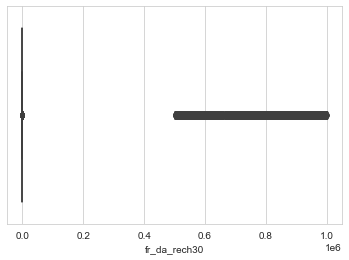

In [26]:
sns.boxplot(cdp_df['fr_da_rech30'])

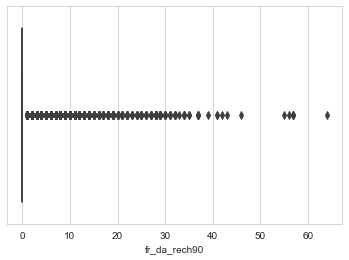

In [27]:
sns.boxplot(cdp_df['fr_da_rech90'])

In [28]:
# based on my observation above, will remove the outliers.
clean_Data=cdp_df.copy()
# Removing outliers from aon column
minThresh=cdp_df['aon'].quantile(.01)
maxThresh=cdp_df['aon'].quantile(.98)
clean_Data=clean_Data[clean_Data['aon']>=minThresh]
clean_Data=clean_Data[clean_Data['aon']<=maxThresh]


# Removing outliers from daily_decr30 column
minThresh=cdp_df['daily_decr30'].quantile(.01)
maxThresh=cdp_df['daily_decr30'].quantile(.98)
clean_Data=clean_Data[clean_Data['daily_decr30']>=minThresh]
clean_Data=clean_Data[clean_Data['daily_decr30']<=maxThresh]


# Removing outliers from daily_decr90 column
minThresh=cdp_df['daily_decr90'].quantile(.01)
maxThresh=cdp_df['daily_decr90'].quantile(.98)
clean_Data=clean_Data[clean_Data['daily_decr90']>=minThresh]
clean_Data=clean_Data[clean_Data['daily_decr90']<=maxThresh]


# Removing outliers from rental30 column
minThresh=cdp_df['rental30'].quantile(.03)
maxThresh=cdp_df['rental30'].quantile(.98)
clean_Data=clean_Data[clean_Data['rental30']>=minThresh]
clean_Data=clean_Data[clean_Data['rental30']<=maxThresh]


# Removing outliers from rental90 column
minThresh=cdp_df['rental90'].quantile(.03)
maxThresh=cdp_df['rental90'].quantile(.98)
clean_Data=clean_Data[clean_Data['rental90']>=minThresh]
clean_Data=clean_Data[clean_Data['rental90']<=maxThresh]


# Removing outliers from last_rech_date_ma column
minThresh=cdp_df['last_rech_date_ma'].quantile(.01)
maxThresh=cdp_df['last_rech_date_ma'].quantile(.98)
clean_Data=clean_Data[clean_Data['last_rech_date_ma']>=minThresh]
clean_Data=clean_Data[clean_Data['last_rech_date_ma']<=maxThresh]


# Removing outliers from last_rech_date_da column
minThresh=cdp_df['last_rech_date_da'].quantile(.01)
maxThresh=cdp_df['last_rech_date_da'].quantile(.98)
clean_Data=clean_Data[clean_Data['last_rech_date_da']>=minThresh]
clean_Data=clean_Data[clean_Data['last_rech_date_da']<=maxThresh]

# Removing outliers from medianmarechprebal90 column
minThresh=cdp_df['medianmarechprebal90'].quantile(.01)
maxThresh=cdp_df['medianmarechprebal90'].quantile(.98)
clean_Data=clean_Data[clean_Data['medianmarechprebal90']>=minThresh]
clean_Data=clean_Data[clean_Data['medianmarechprebal90']<=maxThresh]

minThresh=cdp_df['medianmarechprebal30'].quantile(.01)
maxThresh=cdp_df['medianmarechprebal30'].quantile(.98)
clean_Data=clean_Data[clean_Data['medianmarechprebal30']>=minThresh]
clean_Data=clean_Data[clean_Data['medianmarechprebal30']<=maxThresh]

# Removing outliers above 98%le as obsrved earlier from the below mentioned columns.
colList_ToRemoveOutliers=['last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30',  'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'medianamnt_loans90', 
       'payback30', 'payback90']

for sActiveCol in colList_ToRemoveOutliers:
    maxThresh=cdp_df[sActiveCol].quantile(.98)
    clean_Data=clean_Data[clean_Data[sActiveCol]<=maxThresh]


In [29]:
print(cdp_df.shape[0]-clean_Data.shape[0])
print(((cdp_df.shape[0]-clean_Data.shape[0])/cdp_df.shape[0])*100)
#We have almost lost 26%ge of data

57219
27.343234796570805


In [30]:
clean_Data.describe()
# As we can see we have reduced the outliers from our data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,year
count,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.0,152043.000000,152043.000000,...,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.0
mean,0.874634,636.118552,4042.864720,4481.673738,2124.990979,2691.749490,5.515216,0.0,1763.126254,3.573529,...,6.535427,0.049328,3.312313,20.828752,6.576705,0.042310,2.565760,3.149598,6.764054,2016.0
std,0.331134,472.947750,5866.048064,6731.021306,2823.168982,3662.480388,7.082955,0.0,1778.873415,3.125080,...,1.987987,0.197882,2.923138,18.498413,1.939523,0.183889,3.904083,4.640391,0.729416,0.0
min,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2016.0
25%,1.000000,240.000000,37.700000,37.939333,291.770000,313.020000,1.000000,0.0,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,2016.0
50%,1.000000,508.000000,1178.232333,1200.000000,986.000000,1202.400000,3.000000,0.0,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.625000,7.000000,2016.0
75%,1.000000,935.000000,6099.000000,6503.180000,2790.700000,3553.140000,7.000000,0.0,1924.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.500000,7.000000,2016.0
max,1.000000,2041.000000,32977.000000,39060.000000,15952.710000,21520.210000,43.000000,0.0,10000.000000,16.000000,...,12.000000,1.000000,17.000000,102.000000,12.000000,1.000000,24.000000,32.500000,8.000000,2016.0


In [31]:
for sActiveCol in colList:
    print("2 percentile for {} is {} and min is {}".format(sActiveCol,clean_Data[sActiveCol].quantile(.02),clean_Data[sActiveCol].min()))
    print("98 percentile for {} is {} and max value is {}".format(sActiveCol,clean_Data[sActiveCol].quantile(.98),clean_Data[sActiveCol].max()))

2 percentile for label is 0.0 and min is 0
98 percentile for label is 1.0 and max value is 1
2 percentile for aon is 82.0 and min is 55.0
98 percentile for aon is 1827.0 and max value is 2041.0
2 percentile for daily_decr30 is 0.0 and min is 0.0
98 percentile for daily_decr30 is 22130.115466666673 and max value is 32977.0
2 percentile for daily_decr90 is 0.0 and min is 0.0
98 percentile for daily_decr90 is 25670.74120000008 and max value is 39060.0
2 percentile for rental30 is 0.0 and min is 0.0
98 percentile for rental30 is 11542.072400000006 and max value is 15952.71
2 percentile for rental90 is 0.0 and min is 0.0
98 percentile for rental90 is 15024.098400000003 and max value is 21520.21
2 percentile for last_rech_date_ma is 0.0 and min is 0.0
98 percentile for last_rech_date_ma is 31.0 and max value is 43.0
2 percentile for last_rech_date_da is 0.0 and min is 0.0
98 percentile for last_rech_date_da is 0.0 and max value is 0.0
2 percentile for last_rech_amt_ma is 0.0 and min is 0
98 

In [32]:
clean_Data['last_rech_date_da'].value_counts()

0.0    152043
Name: last_rech_date_da, dtype: int64

In [33]:


#As we can see that features i.e. year, fr_da_rech90, last_rech_date_da, cnt_da_rech30 and cnt_da_rech90. 
clean_Data.drop(['year', 'fr_da_rech90', 'last_rech_date_da', 'cnt_da_rech30','cnt_da_rech90'],inplace=True,axis=1)

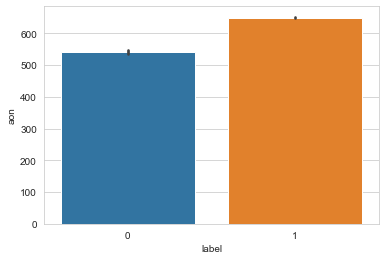

In [34]:
# Exploring through Bar Plots
sns.barplot(x='label',y='aon',data=clean_Data)
# No significance difference

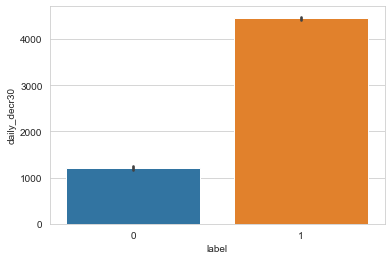

In [35]:
sns.barplot(x='label',y='daily_decr30',data=clean_Data)
# Clearly understandable, if daily amount spent is high then probability of being a defaulter is very less.

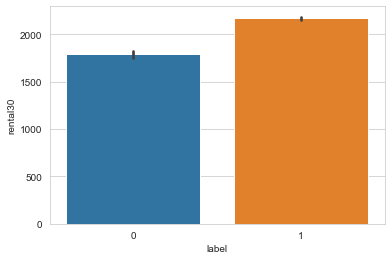

In [36]:
sns.barplot(x='label',y='rental30',data=clean_Data)
# No significance difference to distinguish between defaulter and non-defaulter.

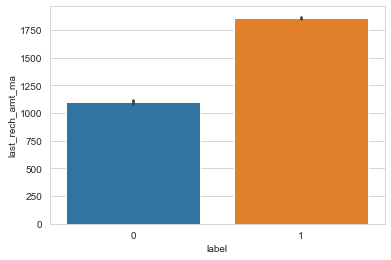

In [37]:
sns.barplot(x='label',y='last_rech_amt_ma',data=clean_Data)
# Defenitely, the one who is recharging it's account is likely not to be a defaulter.

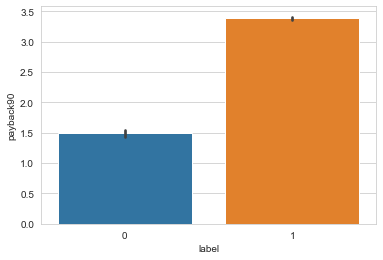

In [38]:
sns.barplot(x='label',y='payback90',data=clean_Data)

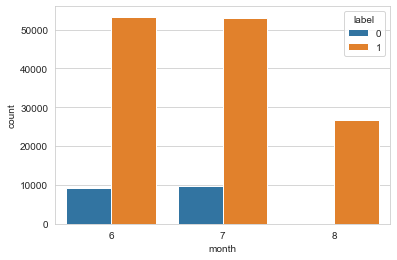

In [39]:
sns.countplot(x='month',hue='label',data=clean_Data)
#Clearly in 8th month none is default, probably people are earning well or enough data is not provided for two months.

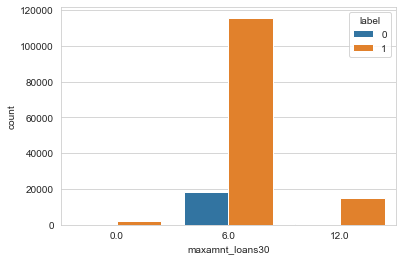

In [40]:
sns.countplot(x='maxamnt_loans30',hue='label',data=clean_Data)

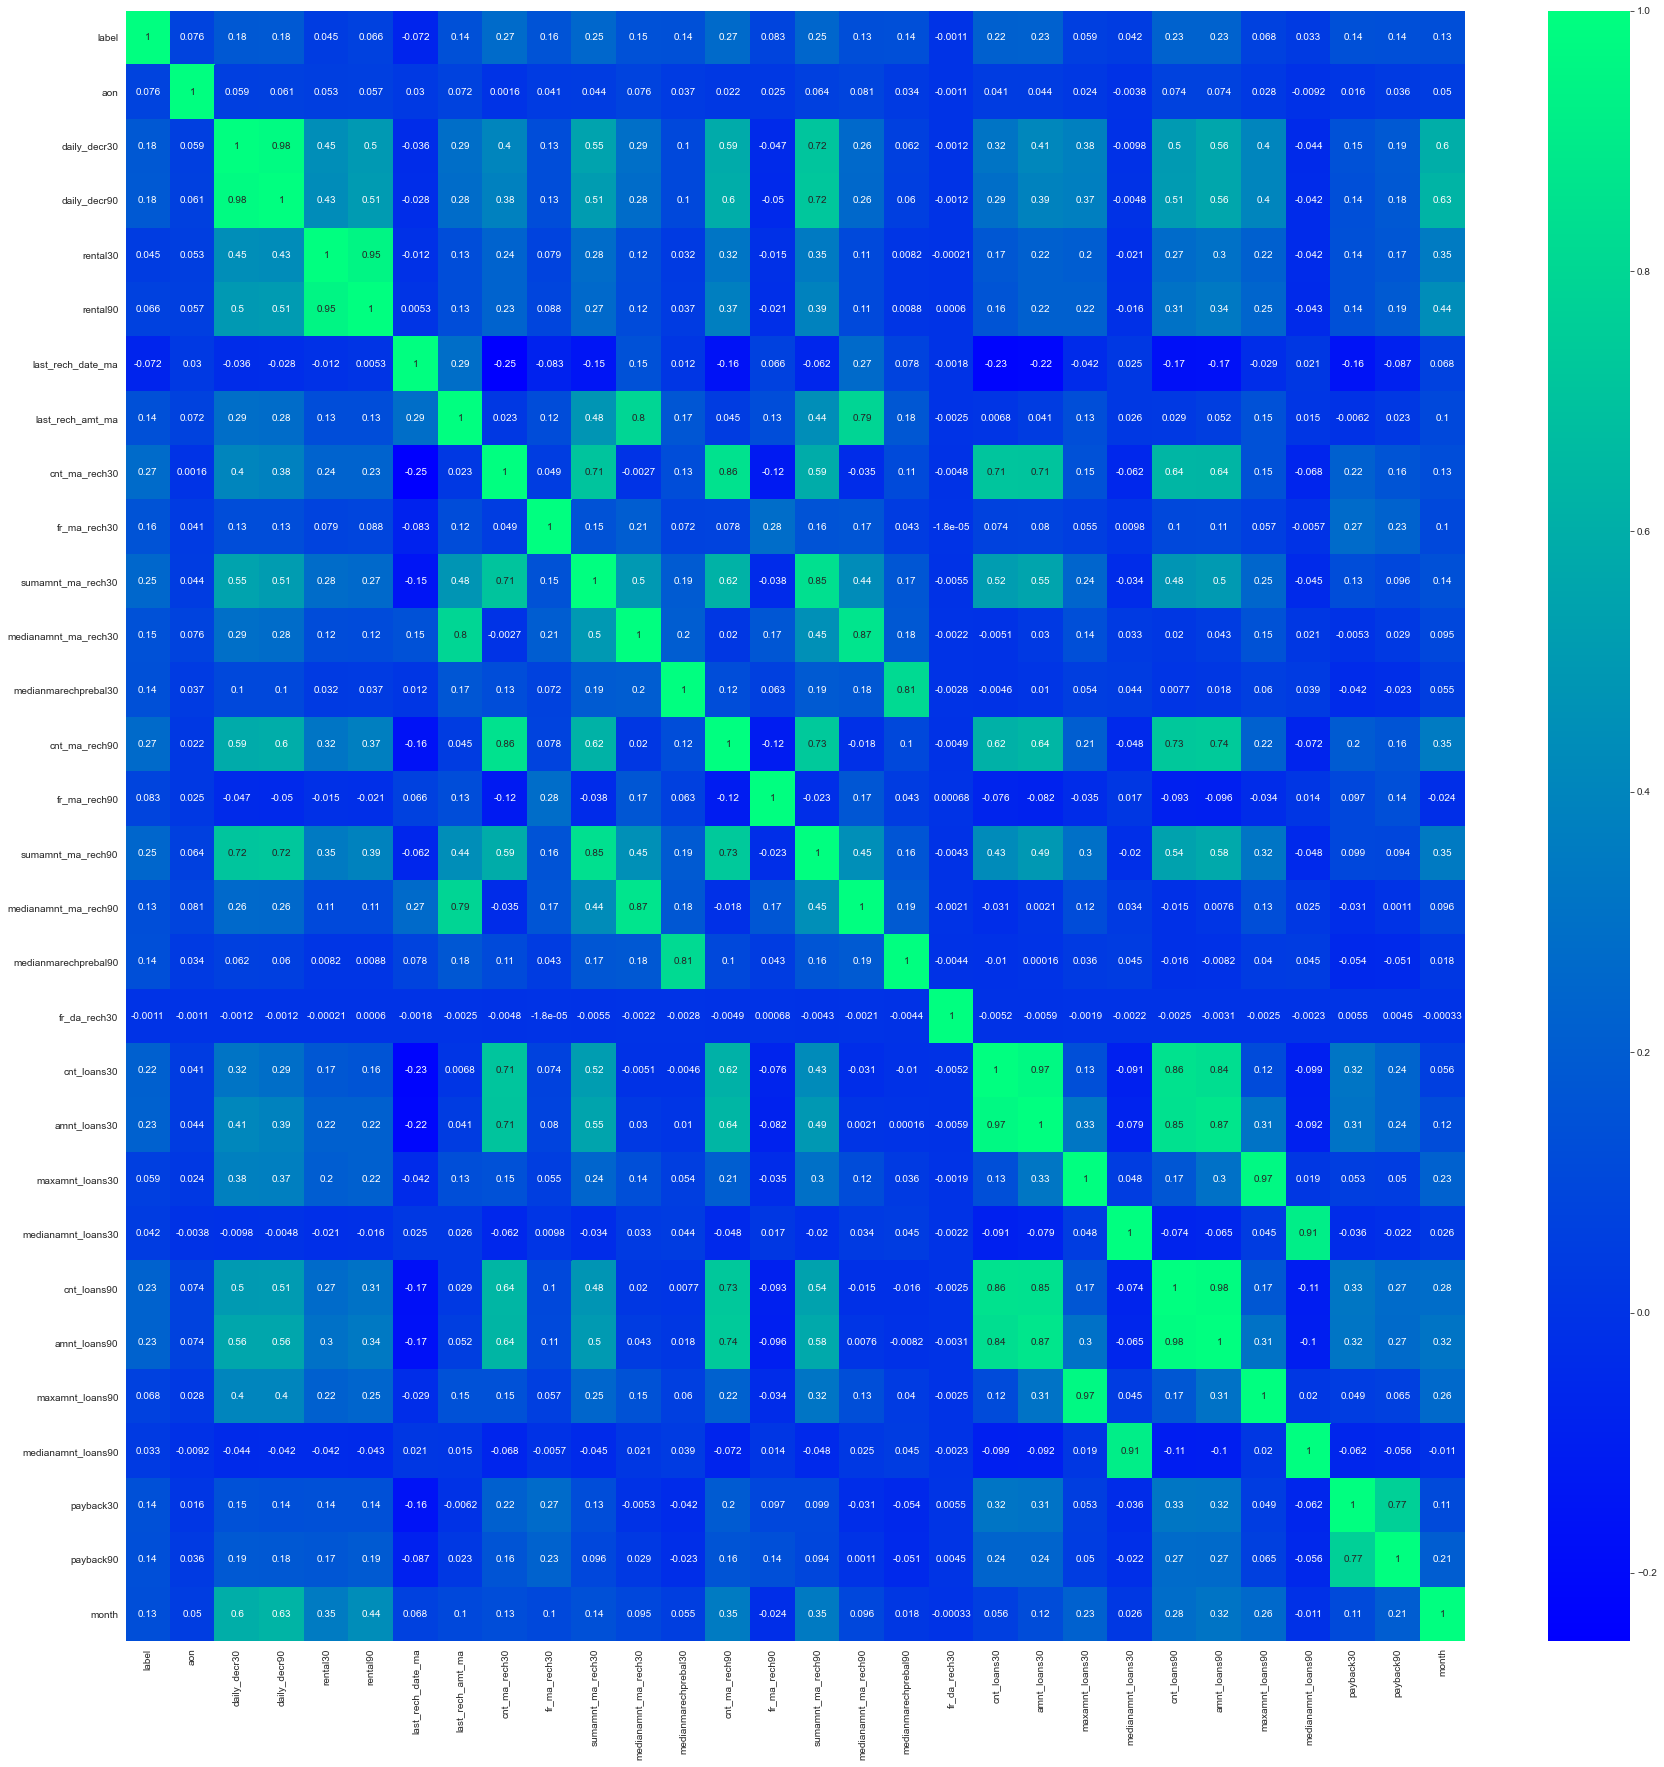

In [41]:
# correlation plot
corr_mat=clean_Data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_mat,annot=True,cmap='winter')

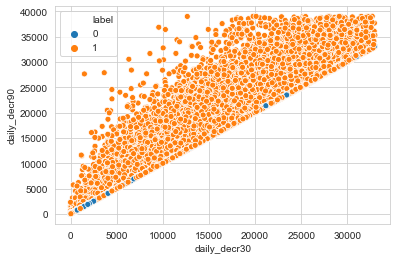

In [42]:
# Scatter plot
sns.set_style('whitegrid')
sns.scatterplot(x='daily_decr30',y='daily_decr90',hue='label',data=clean_Data)

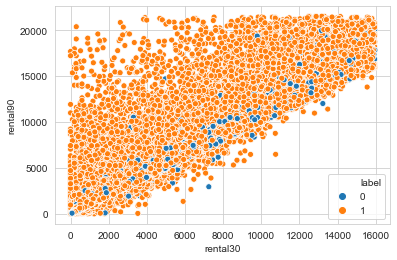

In [43]:
sns.set_style('whitegrid')
sns.scatterplot(x='rental30',y='rental90',hue='label',data=clean_Data)
# Clearly our observation is correct as they are highly correlated features.

In [44]:
# Feature selection
# We will remove highky correlated features.
cols_ToRemoveList=['medianmarechprebal90','pcircle','fr_da_rech30','fr_ma_rech90','rental90','daily_decr90','cnt_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','maxamnt_loans90','medianamnt_loans90','last_rech_amt_ma','payback90','month']

clean_Data.drop(cols_ToRemoveList,inplace=True,axis=1)

In [45]:
clean_Data.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'payback30'],
      dtype='object')

In [46]:
clean_Data.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,payback30
count,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000
mean,0.874634,636.118552,4042.864720,2124.990979,5.515216,3.573529,3.737686,6109.767171,1570.763639,69.739032,2.557231,16.260610,6.535427,0.049328,3.312313,20.828752,2.565760
std,0.331134,472.947750,5866.048064,2823.168982,7.082955,3.125080,4.818526,6030.992200,1532.423387,101.080166,1.940365,12.489773,1.987987,0.197882,2.923138,18.498413,3.904083
min,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,240.000000,37.700000,291.770000,1.000000,1.000000,0.000000,1540.000000,770.000000,11.500000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,0.000000
50%,1.000000,508.000000,1178.232333,986.000000,3.000000,3.000000,2.000000,4617.000000,1539.000000,33.800000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,0.000000
75%,1.000000,935.000000,6099.000000,2790.700000,7.000000,5.000000,6.000000,8654.000000,1547.000000,77.685000,3.000000,24.000000,6.000000,0.000000,5.000000,30.000000,4.000000
max,1.000000,2041.000000,32977.000000,15952.710000,43.000000,16.000000,22.000000,36048.000000,8000.000000,701.000000,10.000000,72.000000,12.000000,1.000000,17.000000,102.000000,24.000000


# Model Selection

In [47]:
Y=clean_Data['label']
X=clean_Data.drop('label',axis=1)

In [48]:
# Normalization
colList=list(X.columns)
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [105]:
X.describe()

,aon,daily_decr30,rental30,last_rech_date_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,payback30
count,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000,152043.000000
mean,0.292608,0.122596,0.133206,0.128261,0.223346,0.169895,0.169490,0.196345,0.099485,0.255723,0.225842,0.544619,0.049328,0.194842,0.204203,0.106907
std,0.238141,0.177883,0.176971,0.164720,0.195317,0.219024,0.167304,0.191553,0.144194,0.194037,0.173469,0.165666,0.197882,0.171949,0.181357,0.162670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093152,0.001143,0.018290,0.023256,0.062500,0.000000,0.042721,0.096250,0.016405,0.100000,0.083333,0.500000,0.000000,0.058824,0.058824,0.000000
50%,0.228097,0.035729,0.061808,0.069767,0.187500,0.090909,0.128079,0.192375,0.048217,0.200000,0.166667,0.500000,0.000000,0.117647,0.117647,0.000000
75%,0.443102,0.184947,0.174936,0.162791,0.312500,0.272727,0.240069,0.193375,0.110820,0.300000,0.333333,0.500000,0.000000,0.294118,0.294118,0.166667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SVMSMOTE

In [51]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=DecisionTreeClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 62 we are getting accuracy of 86.

Best(max) accuracy score is 0.8636587852280575 for random state 62.


In [52]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=KNeighborsClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 81 we are getting accuracy of 88% approximately.

Best(max) accuracy score is 0.877371830708014 for random state 81.


In [53]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=LogisticRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 47 we are getting accuracy of 88% approximately.

Best(max) accuracy score is 0.8797395507908843 for random state 47.


In [54]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=AdaBoostClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 67 we are getting accuracy of 90% approximately.

Best(max) accuracy score is 0.902463086586208 for random state 67.


In [55]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=GradientBoostingClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 67 we are getting accuracy of 91% approximately.

Best(max) accuracy score is 0.9088098918083463 for random state 67.


In [56]:
# As we can see Gradient boosting is giving us best results, let's analyse it further on Gradient boosting classifier.
svmSmote = SVMSMOTE()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=67,test_size=0.2)
X_new, y_new = svmSmote.fit_resample(x_train, y_train)

In [57]:
y_new.value_counts()

1    106318
0    106318
Name: label, dtype: int64

In [58]:
grad_boostModel=GradientBoostingClassifier()
grad_boostModel.fit(X_new,y_new)
pred=grad_boostModel.predict(x_test)
active_as=accuracy_score(pred,y_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.8464599296260975
[[ 2481  3405]
 [ 1264 23259]]
              precision    recall  f1-score   support

           0       0.66      0.42      0.52      5886
           1       0.87      0.95      0.91     24523

    accuracy                           0.85     30409
   macro avg       0.77      0.68      0.71     30409
weighted avg       0.83      0.85      0.83     30409



In [59]:
svmSmote = SVMSMOTE()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=62,test_size=0.2)
X_new, y_new = svmSmote.fit_resample(x_train, y_train)
dtcm=DecisionTreeClassifier()
dtcm.fit(X_new,y_new)
pred=dtcm.predict(x_test)
active_as=accuracy_score(pred,y_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.8438291295340196
[[ 2099  3073]
 [ 1676 23561]]
              precision    recall  f1-score   support

           0       0.56      0.41      0.47      5172
           1       0.88      0.93      0.91     25237

    accuracy                           0.84     30409
   macro avg       0.72      0.67      0.69     30409
weighted avg       0.83      0.84      0.83     30409



In [60]:
svmSmote = SVMSMOTE()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=47,test_size=0.2)
X_new, y_new = svmSmote.fit_resample(x_train, y_train)
lrm=LogisticRegression()
lrm.fit(X_new,y_new)
pred=lrm.predict(x_test)
active_as=accuracy_score(pred,y_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.7570127264954454
[[ 2780  6458]
 [  931 20240]]
              precision    recall  f1-score   support

           0       0.75      0.30      0.43      9238
           1       0.76      0.96      0.85     21171

    accuracy                           0.76     30409
   macro avg       0.75      0.63      0.64     30409
weighted avg       0.76      0.76      0.72     30409



In [61]:
grad_boostModel=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=67,test_size=0.2)
grad_boostModel.fit(x_train,y_train)
pred=grad_boostModel.predict(x_test)
active_as=accuracy_score(pred,y_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.9066394817323818
[[ 1191   319]
 [ 2520 26379]]
              precision    recall  f1-score   support

           0       0.32      0.79      0.46      1510
           1       0.99      0.91      0.95     28899

    accuracy                           0.91     30409
   macro avg       0.65      0.85      0.70     30409
weighted avg       0.95      0.91      0.92     30409



In [62]:
# Gradient Boosting Classifier is giving best result. Let's deploy it after checking it's cross val score and best Params.
from sklearn.model_selection import GridSearchCV
criterion=['friedman_mse', 'mse']
n_estimators=[100,200,300]

for crit in criterion:
    for estimator in n_estimators:
        gbc=GradientBoostingClassifier(criterion=crit,n_estimators=estimator)
        gbc.fit(x_train,y_train)
        pred=gbc.predict(x_test)
        active_as=accuracy_score(pred,y_test)
        print("Accuracy score is {} for criterion {} and {} estimators".format(accuracy_score(pred,y_test),crit,estimator))
# friedman_mse at 200 estimators is giving best results.

Accuracy score is 0.9066394817323818 for criterion friedman_mse and 100 estimators
Accuracy score is 0.909138741819856 for criterion friedman_mse and 200 estimators
Accuracy score is 0.9088756618106482 for criterion friedman_mse and 300 estimators
Accuracy score is 0.9066394817323818 for criterion mse and 100 estimators
Accuracy score is 0.909105856818705 for criterion mse and 200 estimators
Accuracy score is 0.9089085468117991 for criterion mse and 300 estimators


In [86]:
# Plotting AUC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

gbc=GradientBoostingClassifier(criterion='friedman_mse',n_estimators=200)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [87]:
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
print("False positive rate : ",fpr)
print("True positive rate : ",tpr)

False positive rate :  [0.         0.         0.         ... 0.99595796 0.99595796 1.        ]
True positive rate :  [0.00000000e+00 3.74559892e-05 4.30743876e-03 ... 9.99962544e-01
 1.00000000e+00 1.00000000e+00]


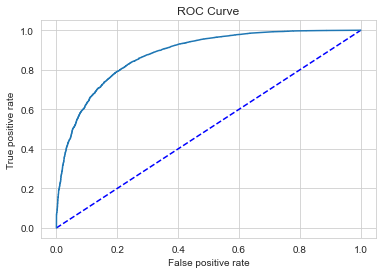

In [88]:
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [89]:
auc_score=roc_auc_score(y_test,gbc.predict(x_test))
print(auc_score)
# It's not a good AUC score, but an acceptable one.

0.6742282849987562


In [91]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))
# Implies, we are not over/under fitting the model. cross_val_score is good.

std: 0.0
cross_val_score: 90.83680411582979


In [102]:
# I am releasing Gradient Boosting Classifier.
import joblib
# Saving model as pickle in a file
joblib.dump(gbc,'GradBoost_Cred_DefaulterProj.pkl')

['GradBoost_Cred_DefaulterProj.pkl']